In [32]:
import numpy as np
import pandas as pd

import stellarpunk.sim as sim

In [33]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [42]:
generator = sim.UniverseGenerator()
stellar_punk = generator.generate_universe(5, 5, 3)
pchain = stellar_punk.production_chain

In [43]:
pchain.ranks

array([4, 9, 4, 3])

In [44]:
slices = [np.s_[pchain.ranks[0:i].sum():pchain.ranks[0:i+1].sum()] for i in range(len(pchain.ranks))]

In [45]:
(pchain.adj_matrix[slices[2], slices[3]].T @ pchain.adj_matrix[slices[1], slices[2]].T @ pchain.adj_matrix[slices[0], slices[1]].T).T

array([[   960.,  32390.,    425.],
       [ 14604., 233618.,    504.],
       [  3822.,  43709.,   1660.],
       [  4104.,  75958.,    623.]])

In [50]:
(pchain.adj_matrix[slices[0], slices[1]] @ pchain.adj_matrix[slices[1], slices[2]] @ pchain.adj_matrix[slices[2], slices[3]])

array([[   960.,  32390.,    425.],
       [ 14604., 233618.,    504.],
       [  3822.,  43709.,   1660.],
       [  4104.,  75958.,    623.]])

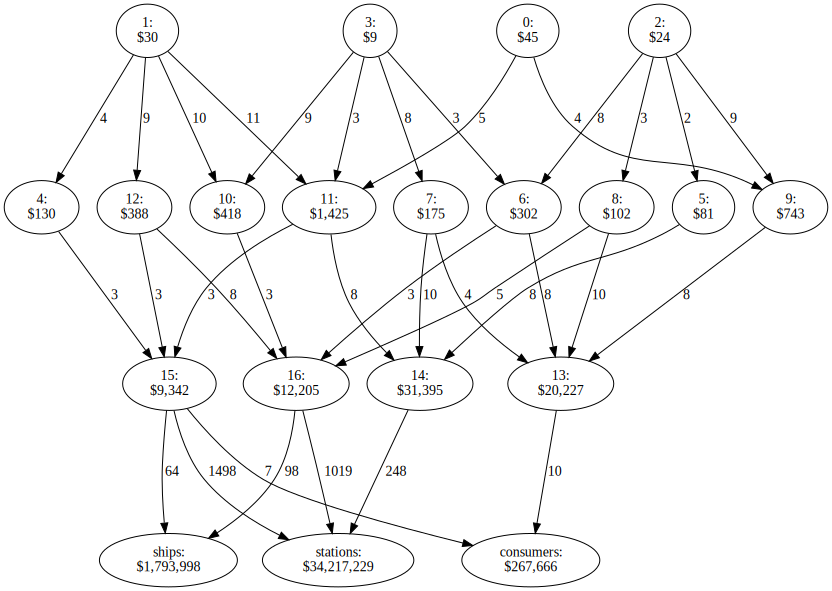

In [48]:
pchain.viz()